<a href="https://colab.research.google.com/github/nlviyuli/SentimenAnalisisLSTM/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install --force-reinstall tensorflow==2.16.1

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.3 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

In [1]:
import pandas as pd
import nltk
import numpy as np
import random
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import files  # Jika menggunakan Google Colab

# Membaca file CSV dengan opsi on_bad_lines='skip'
df = pd.read_csv('/content/drive/MyDrive/data_label_indo.csv',
                 sep=';',  # Ganti sesuai dengan pemisah yang benar
                 on_bad_lines='skip')

# Menampilkan beberapa baris pertama DataFrame
print(df.head())

                                              riview  sentimen
0  buruk,mana,orang,pesan,karna,butuh,cepat,aplik...  Negative
1  gk,efektif,resep,obat,tebus,pakai,aplikasi,pil...  Negative
2  apk,alami,error,mana,konfirmasi,bayar,ulang,ka...  Negative
3  rekomendasi,cs,nya,beli,obat,konfirmasi,jam,ap...   Neutral
4  minggu,updatesudah,update,lagiheran,gk,aplikas...  Negative


In [4]:
# Cek jumlah kolom
print("Jumlah kolom:", df.shape[1])

# Cek nama-nama kolom
print("Nama kolom:")
print(df.columns.tolist())

Jumlah kolom: 2
Nama kolom:
['riview', 'sentimen']


Tahap WORD2VEC

Menampilkan data

In [5]:
df = pd.read_csv('/content/drive/MyDrive/data_label_indo.csv', sep=';', header=None)
print(df.head())

df = pd.read_csv('/content/drive/MyDrive/data_label_indo.csv', sep=';', header=0)
print(df.columns)

                                                   0         1
0                                             riview  sentimen
1  buruk,mana,orang,pesan,karna,butuh,cepat,aplik...  Negative
2  gk,efektif,resep,obat,tebus,pakai,aplikasi,pil...  Negative
3  apk,alami,error,mana,konfirmasi,bayar,ulang,ka...  Negative
4  rekomendasi,cs,nya,beli,obat,konfirmasi,jam,ap...   Neutral
Index(['riview', 'sentimen'], dtype='object')


In [9]:
!pip install gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)


In [6]:
import numpy
import gensim
print("NumPy version:", numpy.__version__)
print("Gensim version:", gensim.__version__)

NumPy version: 1.26.4
Gensim version: 4.3.3


In [7]:
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# Download tokenizer
nltk.download('punkt')
nltk.download('punkt_tab')

# Baca data
df = pd.read_csv('/content/drive/MyDrive/data_label_indo.csv', sep=';')

# Ambil kolom teks
texts = df['riview'].astype(str).tolist()

# Tokenisasi
tokenized_texts = [word_tokenize(text.lower()) for text in texts]

# Training Word2Vec
model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=2, workers=4)

# Simpan model
model.save('/content/drive/MyDrive/model_word2vec_halodoc.model')

# Tampilkan vektor kata
words = list(model.wv.index_to_key)
vectors = [model.wv[word] for word in words]
word_vectors_df = pd.DataFrame(vectors, index=words)
print(word_vectors_df.head())

# Simpan vektor kata ke CSV
word_vectors_df.to_csv('word2vec_vectors_halodoc.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


               0         1         2         3         4         5         6   \
,        0.036497  0.148823  0.337702  0.565967 -0.106041 -0.948780  0.745376   
bantu    0.005390  0.067369  0.137197  0.225093 -0.031075 -0.378519  0.292885   
dokter   0.017881  0.078429  0.154893  0.267042 -0.038309 -0.446826  0.352436   
halodoc  0.011729  0.099426  0.188532  0.314358 -0.050306 -0.538626  0.422363   
obat     0.013817  0.092945  0.186499  0.321756 -0.052588 -0.542153  0.432323   

               7         8         9   ...        90        91        92  \
,        1.104233 -0.575745 -0.626469  ...  0.638706  0.099875  0.257213   
bantu    0.439748 -0.229133 -0.253047  ...  0.254250  0.039882  0.101070   
dokter   0.532072 -0.286012 -0.295584  ...  0.304066  0.055057  0.131706   
halodoc  0.629813 -0.318949 -0.362380  ...  0.356044  0.057830  0.142863   
obat     0.640465 -0.337592 -0.355803  ...  0.375985  0.055816  0.153308   

               93        94        95        96        9

Pembagian data latih dan data uji

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

# Konversi nilai string 'negative', 'positive', dan 'neutral' menjadi numerik
df.loc[:, 'sentimen'] = df['sentimen'].replace({'negative': 0, 'positive': 1, 'neutral': 2})
# Verifikasi hasil konversi
print(df['sentimen'].unique())  # Harus menghasilkan [0, 1, 2]

# Menggunakan data yang sudah ada
reviews = df['riview'].values  # Review teks
labels = df['sentimen'].values  # Label biner (0, 1, atau 2)

# **Convert any float values in 'reviews' to strings:**
reviews = [str(review) for review in reviews]

# Tokenisasi dan padding
MAX_NB_WORDS = 20000  # Contoh nilai maksimal kata
MAX_SEQUENCE_LENGTH = 100  # Contoh panjang maksimal urutan
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(reviews)
X = tokenizer.texts_to_sequences(reviews)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

# Konversi label menjadi array numpy
Y = np.array(labels)
# Pembagian data latih dan uji (80%-20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Tampilkan hasil pembagian data
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}, Y_test shape: {Y_test.shape}")

['Negative' 'Neutral' 'Positive' nan]
X_train shape: (1132, 100), X_test shape: (284, 100)
Y_train shape: (1132,), Y_test shape: (284,)


In [9]:
print(df['sentimen'].value_counts())


sentimen
Positive    1190
Negative     151
Neutral       74
Name: count, dtype: int64


LSTM

In [ ]:
!pip install tensorflow

In [13]:
# Set seed agar hasil stabil
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/data_label_indo.csv', sep=';')

# Rename column jika perlu
df = df.rename(columns={"riview": "review"})

# Handle NaN di review
df['review'] = df['review'].fillna('').astype(str)

# Konversi label menjadi numerik
df['sentimen'] = df['sentimen'].replace({'Negative': 0, 'Positive': 1, 'Neutral': 2})
df = df.dropna(subset=['sentimen'])

# Tokenisasi
MAX_NB_WORDS = 5000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(df['review'])
X = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

# Label encoding & one-hot encoding
y = to_categorical(df['sentimen'], num_classes=3)

# Split data dengan seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Model LSTM
model = Sequential()
model.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=EMBEDDING_DIM))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(150, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")
print(f"Test loss: {loss:.4f}")

Epoch 1/15


<ipython-input-13-d301d4b7f5d1>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentimen'] = df['sentimen'].replace({'Negative': 0, 'Positive': 1, 'Neutral': 2})


18/18 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.7147 - loss: 0.7671 - val_accuracy: 0.8481 - val_loss: 0.4547
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8329 - loss: 0.4549 - val_accuracy: 0.8657 - val_loss: 0.4469
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8713 - loss: 0.4325 - val_accuracy: 0.8834 - val_loss: 0.4270
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8775 - loss: 0.3994 - val_accuracy: 0.8940 - val_loss: 0.3863
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8938 - loss: 0.3327 - val_accuracy: 0.8975 - val_loss: 0.3581
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9099 - loss: 0.2686 - val_accuracy: 0.8975 - val_loss: 0.3386
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9241 - loss: 0.2110 - val_accuracy: 0.9011 - val_loss: 0.3325
Epoch 8/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9359 - loss: 0.1690 - val_accuracy: 0.9046 - val_loss: 0.3346
Epo

In [11]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf

# Set seed agar hasil stabil
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/data_label_indo.csv', sep=';')

# Rename column jika perlu
df = df.rename(columns={"riview": "review"})

# Handle NaN di review
df['review'] = df['review'].fillna('').astype(str)

# Konversi label menjadi numerik
df['sentimen'] = df['sentimen'].replace({'Negative': 0, 'Positive': 1, 'Neutral': 2})
df = df.dropna(subset=['sentimen'])

# Tokenisasi
MAX_NB_WORDS = 5000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(df['review'])
X = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

# Label encoding & one-hot encoding
y = to_categorical(df['sentimen'], num_classes=3)

# Split data dengan seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Model LSTM
model = Sequential()
model.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=EMBEDDING_DIM))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")
print(f"Test loss: {loss:.4f}")


Epoch 1/15


<ipython-input-11-19f6c2259f24>:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentimen'] = df['sentimen'].replace({'Negative': 0, 'Positive': 1, 'Neutral': 2})


18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 723ms/step - accuracy: 0.7206 - loss: 0.7997 - val_accuracy: 0.8481 - val_loss: 0.4466
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 690ms/step - accuracy: 0.8377 - loss: 0.4563 - val_accuracy: 0.8693 - val_loss: 0.4525
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 694ms/step - accuracy: 0.8691 - loss: 0.4481 - val_accuracy: 0.8905 - val_loss: 0.4211
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 677ms/step - accuracy: 0.8811 - loss: 0.3999 - val_accuracy: 0.8940 - val_loss: 0.3928
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 677ms/step - accuracy: 0.8893 - loss: 0.3402 - val_accuracy: 0.9011 - val_loss: 0.3653
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 591ms/step - accuracy: 0.9009 - loss: 0.2863 - val_accuracy: 0.8975 - val_loss: 0.3432
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 681ms/step - accuracy: 0.9192 - loss: 0.2250 - val_accuracy: 0.9117 - val_loss: 0.3296
Epoch 8/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 683ms/step - accuracy: 0.9312 - loss: 0.1765 - val_accuracy: 0.901

In [17]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf

# Set seed agar hasil stabil
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/data_label_indo.csv', sep=';')

# Rename column jika perlu
df = df.rename(columns={"riview": "review"})

# Handle NaN di review
df['review'] = df['review'].fillna('').astype(str)

# Konversi label menjadi numerik
df['sentimen'] = df['sentimen'].replace({'Negative': 0, 'Positive': 1, 'Neutral': 2})
df = df.dropna(subset=['sentimen'])

# Tokenisasi
MAX_NB_WORDS = 5000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(df['review'])
X = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

# Label encoding & one-hot encoding
y = to_categorical(df['sentimen'], num_classes=3)

# Split data dengan seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Model LSTM
model = Sequential()
model.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=EMBEDDING_DIM))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(50, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")
print(f"Test loss: {loss:.4f}")


Epoch 1/15


<ipython-input-17-2171ebcaf80e>:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentimen'] = df['sentimen'].replace({'Negative': 0, 'Positive': 1, 'Neutral': 2})


18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 405ms/step - accuracy: 0.7431 - loss: 0.8405 - val_accuracy: 0.8481 - val_loss: 0.5066
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 494ms/step - accuracy: 0.8327 - loss: 0.5016 - val_accuracy: 0.8516 - val_loss: 0.4447
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 379ms/step - accuracy: 0.8555 - loss: 0.4351 - val_accuracy: 0.8693 - val_loss: 0.4336
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 382ms/step - accuracy: 0.8646 - loss: 0.4162 - val_accuracy: 0.8869 - val_loss: 0.4149
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 497ms/step - accuracy: 0.8785 - loss: 0.3744 - val_accuracy: 0.8905 - val_loss: 0.3964
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 359ms/step - accuracy: 0.8895 - loss: 0.3303 - val_accuracy: 0.8975 - val_loss: 0.3742
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 368ms/step - accuracy: 0.9063 - loss: 0.2789 - val_accuracy: 0.9046 - val_loss: 0.3504
Epoch 8/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 492ms/step - accuracy: 0.9172 - loss: 0.2288 - val_accuracy: 0.9046 - 

Confusion Matrix

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 357ms/step
Confusion Matrix:
[[ 19   9   2]
 [  3 232   5]
 [  3   8   2]]

Accuracy: 0.8939929328621908
Precision: 0.8809305537816756
Recall: 0.8939929328621908
F1 Score: 0.8862931817689128


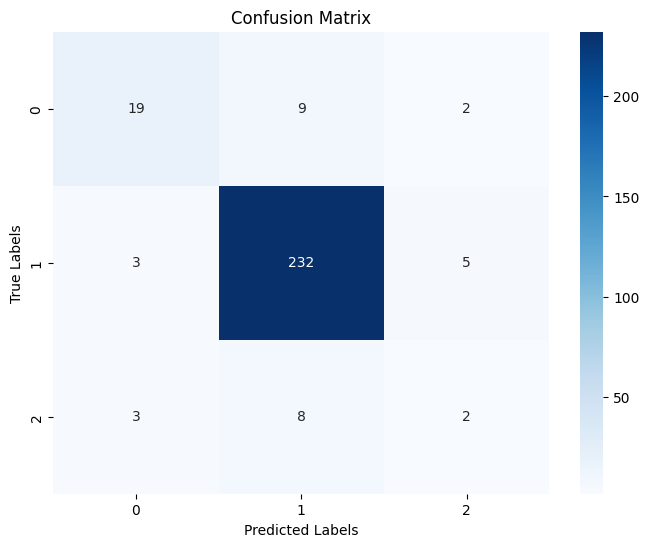

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed agar hasil stabil
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Get predictions from the model
y_pred = model.predict(X_test)
# Jika y_pred berupa probabilitas, ubah menjadi label kelas (indeks kelas dengan probabilitas tertinggi)
if len(y_pred.shape) > 1:  # Mengecek apakah y_pred memiliki lebih dari 1 dimensi (berarti probabilitas)
    y_pred = np.argmax(y_pred, axis=1)
# Ubah y_test yang one-hot encoding menjadi label kelas jika diperlukan
if len(y_test.shape) > 1:  # Mengecek apakah y_test memiliki lebih dari 1 dimensi (berarti one-hot encoding)
    y_test = np.argmax(y_test, axis=1)

# Hitung metrik untuk klasifikasi multikelas
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Specify 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # Specify 'weighted' for multiclass
f1 = f1_score(y_test, y_pred, average='weighted')  # Specify 'weighted' for multiclass

# Tampilkan hasilnya
print("Confusion Matrix:")
print(cm)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Grafik Akurasi dan Loss

Epoch 1/15


<ipython-input-19-153471e2991c>:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentimen'] = df['sentimen'].replace({'Negative': 0, 'Positive': 1, 'Neutral': 2})


18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 403ms/step - accuracy: 0.7431 - loss: 0.8405 - val_accuracy: 0.8481 - val_loss: 0.5066
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 388ms/step - accuracy: 0.8327 - loss: 0.5016 - val_accuracy: 0.8516 - val_loss: 0.4447
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 475ms/step - accuracy: 0.8555 - loss: 0.4351 - val_accuracy: 0.8693 - val_loss: 0.4336
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 489ms/step - accuracy: 0.8646 - loss: 0.4162 - val_accuracy: 0.8869 - val_loss: 0.4149
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 381ms/step - accuracy: 0.8785 - loss: 0.3744 - val_accuracy: 0.8905 - val_loss: 0.3964
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 591ms/step - accuracy: 0.8895 - loss: 0.3303 - val_accuracy: 0.8975 - val_loss: 0.3742
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 479ms/step - accuracy: 0.9063 - loss: 0.2789 - val_accuracy: 0.9046 - val_loss: 0.3504
Epoch 8/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 376ms/step - accuracy: 0.9172 - loss: 0.2288 - val_accuracy: 0.9046 -

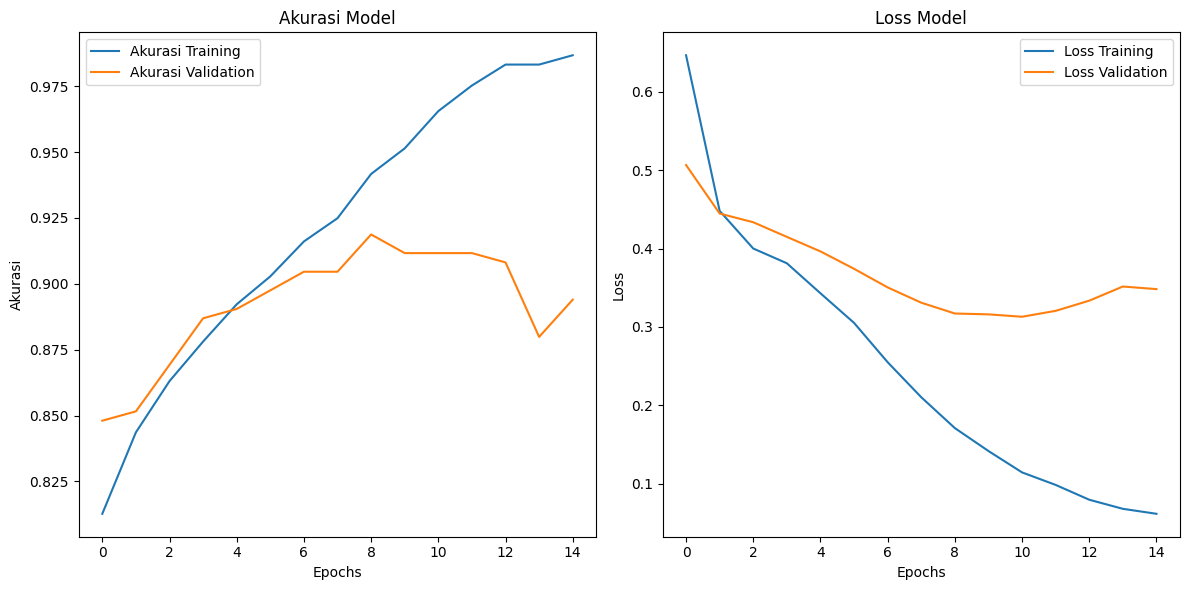

In [19]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt  # Import matplotlib untuk plotting

# Set seed agar hasil stabil
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/data_label_indo.csv', sep=';')

# Rename column jika perlu
df = df.rename(columns={"riview": "review"})

# Handle NaN di review
df['review'] = df['review'].fillna('').astype(str)

# Konversi label menjadi numerik
df['sentimen'] = df['sentimen'].replace({'Negative': 0, 'Positive': 1, 'Neutral': 2})
df = df.dropna(subset=['sentimen'])

# Tokenisasi
MAX_NB_WORDS = 5000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(df['review'])
X = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

# Label encoding & one-hot encoding
y = to_categorical(df['sentimen'], num_classes=3)

# Split data dengan seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Model LSTM
model = Sequential()
model.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=EMBEDDING_DIM))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(50, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Train model & simpan history
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)

# Plot grafik akurasi dan loss
# Plot Akurasi
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validation')
plt.title('Akurasi Model')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validation')
plt.title('Loss Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Tampilkan grafik
plt.tight_layout()
plt.show()